In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re



In [3]:
df = pd.read_csv('logbook_assignment1.csv')
df2 = pd.read_csv('logbook_assignment1.csv')
df3 = pd.read_csv('logbook_assignment1.csv')
# let's print out how many entries there are in the dataset
print(len(df))

C:\Users\Wendy\AppData\Local\Temp\ipykernel_19120\1174220521.py:1: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('logbook_assignment1.csv')
C:\Users\Wendy\AppData\Local\Temp\ipykernel_19120\1174220521.py:2: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('logbook_assignment1.csv')


1174870


C:\Users\Wendy\AppData\Local\Temp\ipykernel_19120\1174220521.py:3: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('logbook_assignment1.csv')


In [4]:
print(df)

                                               date_fueled date_captured  \
0        Cooling System, Heating System, Lights, Spark ...    Apr 7 2022   
1                                               Nov 7 2012   Aug 30 2016   
2                                              Sep 22 2012   Sep 28 2012   
3                                               May 4 2019    May 4 2019   
4                                              Feb 15 2022   Feb 15 2022   
...                                                    ...           ...   
1174865                                        Feb 19 2020   Feb 19 2020   
1174866                                         Dec 6 2019    Dec 6 2019   
1174867                                         Oct 4 2021    Oct 4 2021   
1174868                                        Jul 26 2021   Jul 26 2021   
1174869                                        Mar 12 2019   Mar 12 2019   

         odometer gallons cost_per_gallon total_spent   mpg    miles  \
0         73,37

# Question 1

## 1.1 Date Fields

In [5]:

pattern = r'^[A-Z][a-z]{2} \d{1,2} \d{4}$'
date_fuel = df['date_fueled'].str.match(pattern)
percentage = (date_fuel.sum() / len(df)) * 100
proportion = 100-percentage
print(f"1. {proportion:.2f}% of rows don't match the correct date format.")

1. 11.68% of rows don't match the correct date format.


In [6]:
#Filling in dates as proxy
valid_fueled = df['date_fueled'].astype(str).str.match(pattern)
valid_capture = df['date_captured'].astype(str).str.match(pattern)

df.loc[~valid_fueled & valid_capture, 'date_fueled'] = df['date_captured']
print("2. The dates filled in as a proxy")
df.head()

2. The dates filled in as a proxy


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
0,Apr 7 2022,Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...
1,Nov 7 2012,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150
2,Sep 22 2012,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...
3,May 4 2019,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233
4,Feb 15 2022,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...


In [7]:

df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')
df.loc[~df['date_fueled'].dt.year.between(1900, 2099), 'date_fueled'] = pd.NaT
print("3.")
df.head()

3.


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
0,2022-04-07,Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...
1,2012-11-07,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150
2,2012-09-22,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...
3,2019-05-04,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233
4,2022-02-15,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...


In [8]:
#Removing dates before 2005, and dates in the future relative to 1 Septemeber 2025
min_date = pd.Timestamp("2005-01-01")
max_date = pd.Timestamp("2025-09-01")
mask = (df['date_fueled'] >= min_date) & (df['date_fueled'] <= max_date)
df = df.loc[mask]

print("4. Removed dates that are in the future relative to 1st September 2025 and before 2005")
df.head()

4. Removed dates that are in the future relative to 1st September 2025 and before 2005


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
0,2022-04-07,Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...
1,2012-11-07,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150
2,2012-09-22,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...
3,2019-05-04,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233
4,2022-02-15,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...


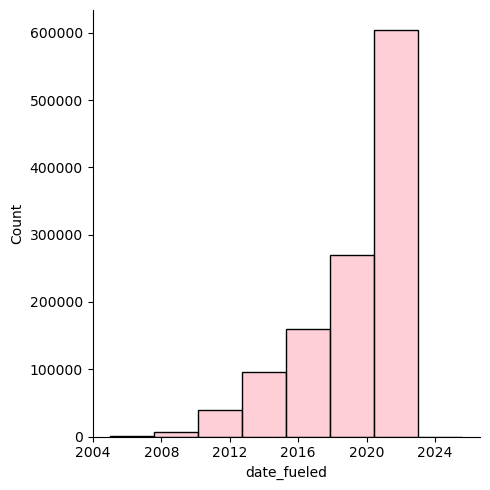

In [9]:
sns.displot(df, x="date_fueled", binwidth = 1000, color='pink')
#make a comment on the distribution of the data.

## 1.2 Numeric Fields

In [10]:
#1.2
gallons_null_count = df['gallons'].isnull().sum()
gal_per = (gallons_null_count / len(df)) * 100
print(f"The percentage of missing gallons values is {gal_per:.2f}%")

miles_count = df['miles'].isnull().sum()
miles_per = (miles_count / len(df)) * 100
print(f"The percentage of missing miles values is {miles_per:.2f}%")

odometer_count = df['odometer'].isnull().sum()
odometer_per = (odometer_count/ len(df)) * 100
print(f"The percentage of missing odometer values is {odometer_per:.2f}%")



The percentage of missing gallons values is 6.32%
The percentage of missing miles values is 87.55%
The percentage of missing odometer values is 12.69%


In [11]:
#converting everything to a float
print("3. Converting the numerical values to floats, after removing the commas: ")
df['gallons'] = df['gallons'].str.replace(",", '').astype(float)
df['mpg']= df['mpg'].str.replace(",", '').astype(float)
df['miles'] = df['miles'].str.replace(",", '').astype(float)


3. Converting the numerical values to floats, after removing the commas: 


In [12]:
print("2. Calculations of the other interdependant columns")

df = df.dropna(subset=['miles', 'gallons', 'mpg'], thresh=2)
df['miles'] = df['gallons']*df['mpg']
df['gallons'] = df['miles']/df['mpg']
df['mpg'] = df['miles']/df['gallons']

df.head()

2. Calculations of the other interdependant columns


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
1,2012-11-07,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,382.9920,https://www.somewebsite.com/bmw/x3/2009/461150
2,2012-09-22,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,227.7435,https://www.somewebsite.com/mercedes-benz/e300...
3,2019-05-04,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,494.9100,https://www.somewebsite.com/bmw/320d/2010/247233
4,2022-02-15,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.6710,https://www.somewebsite.com/honda/passport/201...
5,2021-10-23,Oct 23 2021,"147,567",3.413,$3.739,$12.76,29.0,98.9770,https://www.somewebsite.com/volkswagen/passat/...


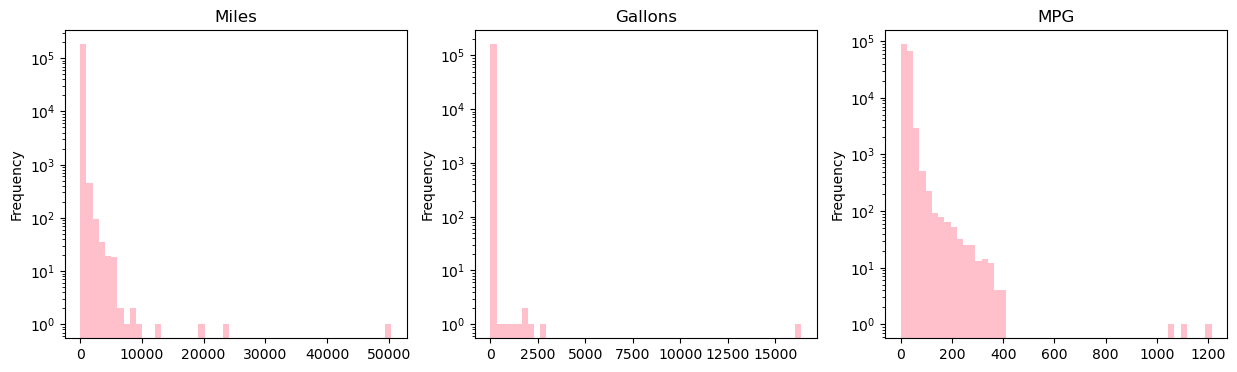

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

df['miles'].plot(kind='hist', bins=50, ax=axes[0], title='Miles', log=True, color='pink')
df['gallons'].plot(kind='hist', bins=50, ax=axes[1], title='Gallons',log=True, color='pink')
df['mpg'].plot(kind='hist', bins=50, ax=axes[2], title='MPG', log=True, color='pink')

plt.show()


In [14]:
df.describe()

,date_fueled,gallons,mpg,miles
count,297676,160725.000000,160723.000000,184008.000000
mean,2018-09-23 02:41:04.112659456,12.953728,25.418163,264.498808
min,2005-01-02 00:00:00,0.000000,0.100000,0.000000
25%,2016-05-12 00:00:00,9.490000,18.200000,180.110850
50%,2019-10-10 00:00:00,12.280000,23.300000,266.747450
75%,2021-09-10 00:00:00,15.113000,29.800000,342.454250
max,2025-04-20 00:00:00,16378.667000,1214.300000,50356.800000
std,NaN,42.923320,14.909832,235.476993


In [15]:

df.describe(include=['O'], exclude=None)


,date_captured,odometer,cost_per_gallon,total_spent,user_url
count,297676,159572,294531,297676,297676
unique,4975,114711,23630,75926,94199
top,Aug 31 2016,"8,201",$2.999,$0.00,https://www.somewebsite.com/citroen/ax/1997/52159
freq,723,8,3478,2426,23


# Question 2

In [16]:
# 2.1
def extract_currency(value):
    if pd.isnull(value):
        return None
    match = re.match(r"^([^\d.]+)", str(value))  
    return match.group(1).strip() if match else None

df["currency"] = df["total_spent"].apply(extract_currency)

In [17]:
# 2.2

def to_float(value):
    if pd.isnull(value):
        return None
    cleaned = re.sub(r"[^\d.]", "", str(value))  # keep only numbers and dot
    try:
        return float(cleaned)
    except ValueError:
        return None

df["total_spent_float"] = df["total_spent"].apply(to_float)
df["cost_per_gallon_float"] = df["cost_per_gallon"].apply(to_float)

In [18]:
# 2.3

def parse_user_url(url):
    try:
        parts = url.strip("/").split("/")
        user_id = parts[-1]
        if len(parts) >= 4:
            car_make = parts[3].capitalize()
            car_model = parts[4].upper()
            car_year = int(parts[5]) if parts[5].isdigit() else None
        else:
            car_make, car_model, car_year = None, None, None
        
        return pd.Series([car_make, car_model, car_year, user_id])
    
    except IndexError:
        return pd.Series([None, None, None, None])
    
df[["car_make", "car_model", "car_year", "user_id"]] = df["user_url"].apply(parse_user_url)
print(df[["car_make", "car_model", "car_year", "user_id"]])

              car_make car_model  car_year  user_id
1                  Bmw        X3    2009.0   461150
2        Mercedes-benz      E300    1998.0   133501
3                  Bmw      320D    2010.0   247233
4                Honda  PASSPORT    2019.0  1038865
5           Volkswagen    PASSAT    2004.0   445811
...                ...       ...       ...      ...
1174836  Mercedes-benz     GL350    2010.0   858263
1174839           Ford     F-150    2006.0   911788
1174840         Toyota    PICKUP    1981.0    82112
1174851           Ford      EDGE    2013.0   516183
1174863            Bmw      135I    2013.0   264134

[297676 rows x 4 columns]


In [19]:
# 2.4 

df["litres_filled"] = pd.to_numeric(df["gallons"], errors="coerce") * 3.78541
df["km_driven"] = pd.to_numeric(df["miles"], errors="coerce") * 1.60934
df["litres_per_100km"] = (df["litres_filled"] / df["km_driven"]) * 100

In [20]:
print(df[[
    "currency", "total_spent_float", "cost_per_gallon_float",
    "car_make", "car_model", "car_year", "user_id",
    "litres_filled", "km_driven", "litres_per_100km"
]].head())

  currency  total_spent_float  cost_per_gallon_float       car_make car_model  \
1        $              67.86                  5.599            Bmw        X3   
2        £              43.53                  5.450  Mercedes-benz      E300   
3        £              54.00                  5.110            Bmw      320D   
4        $              35.29                  3.029          Honda  PASSPORT   
5        $              12.76                  3.739     Volkswagen    PASSAT   

   car_year  user_id  litres_filled   km_driven  litres_per_100km  
1    2009.0   461150      45.879169  616.364345          7.443514  
2    1998.0   133501      30.249211  366.516724          8.253160  
3    2010.0   247233      40.030711  796.478459          5.025963  
4    2019.0  1038865      44.103812  393.758827         11.200717  
5    2004.0   445811      12.919604  159.287645          8.110864  


# Question 3

##### 3.1

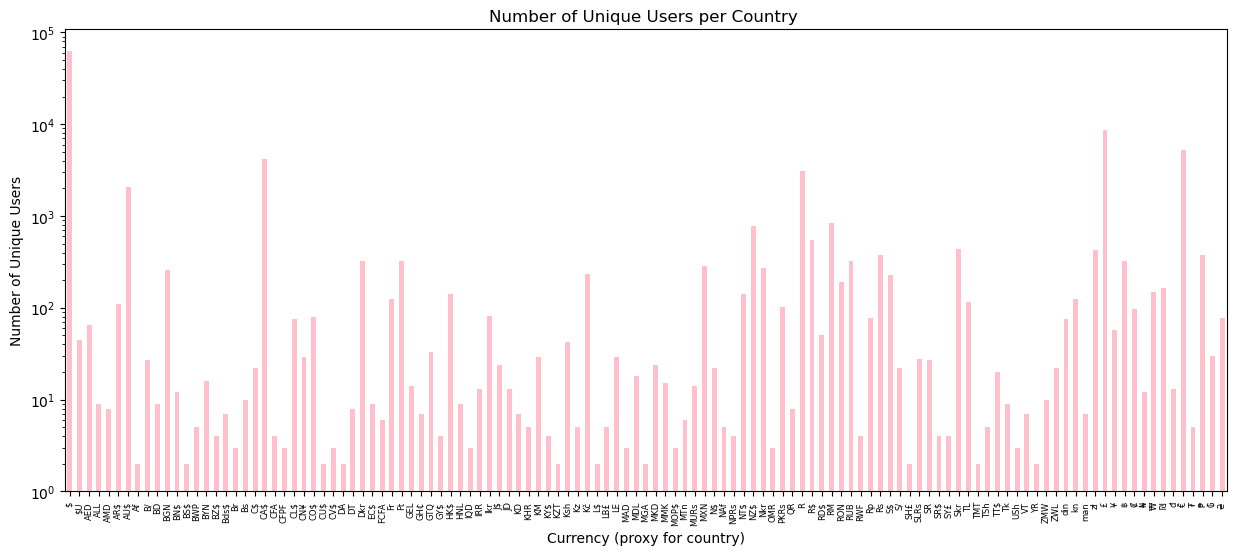

In [21]:
#print (df["currency"].unique())
unique_users = df.groupby('currency')['user_id'].nunique()

fig, ax = plt.subplots(figsize=(15,6))
unique_users.plot(kind='bar', ax=ax, color='pink', log=True) 

ax.set_xlabel("Currency (proxy for country)")
ax.set_ylabel("Number of Unique Users")
ax.set_title("Number of Unique Users per Country ")
ax.tick_params(axis='x', labelsize=6)

plt.show()

##### 3.2

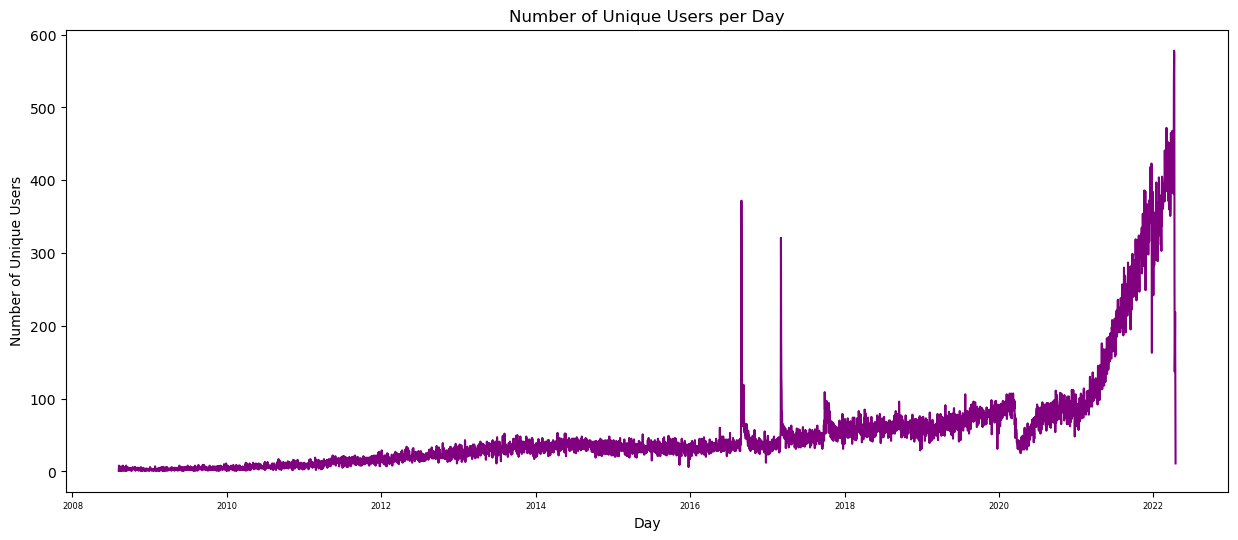

In [22]:
df['date_captured']=pd.to_datetime(df['date_captured'])
df['day']=df['date_captured'].dt.date

unique_user_by_day= df.groupby('day')['user_id'].nunique()

fig, ax = plt.subplots(figsize=(15,6))
unique_user_by_day.plot(kind='line', title= "Number of Unique Users per Day", color='purple')

ax.set_xlabel("Day")
ax.set_ylabel("Number of Unique Users")
ax.tick_params(axis='x', labelsize=6)

plt.show()

##### 3.3

         car_year  year_fueled   age
1          2009.0         2012   3.0
2          1998.0         2012  14.0
3          2010.0         2019   9.0
4          2019.0         2022   3.0
5          2004.0         2021  17.0
...           ...          ...   ...
1174836    2010.0         2019   9.0
1174839    2006.0         2022  16.0
1174840    1981.0         2011  30.0
1174851    2013.0         2021   8.0
1174863    2013.0         2014   1.0

[297676 rows x 3 columns]


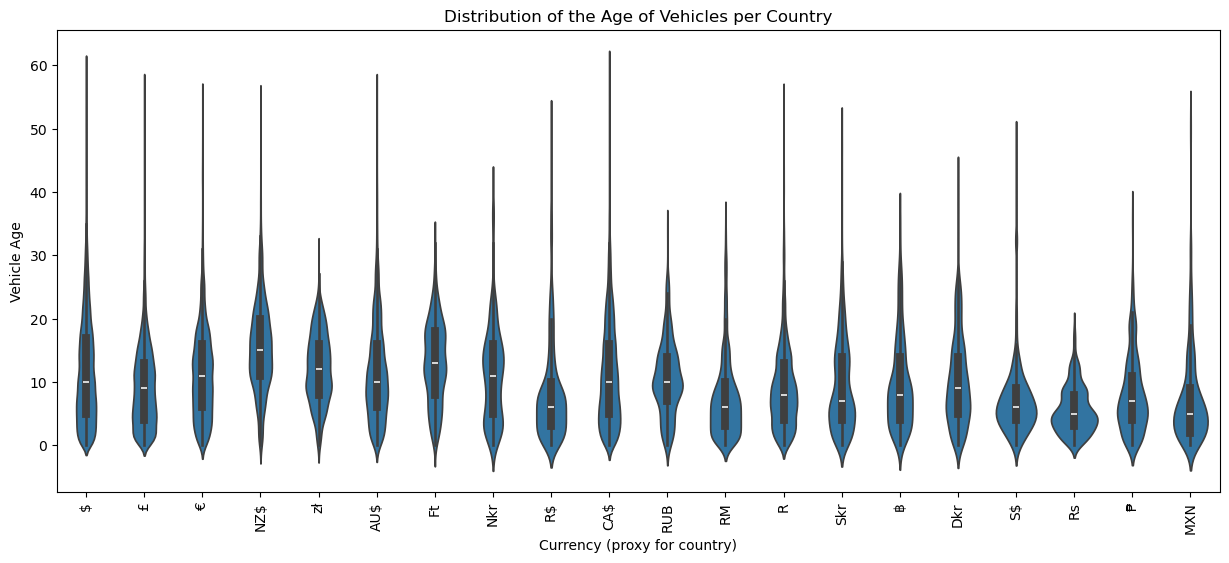

In [23]:

# Make sure we don't overwrite the original
df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')
df['year_fueled'] = df['date_fueled'].dt.year
df['age'] = df['year_fueled'] - df['car_year']
print(df[['car_year', "year_fueled", 'age']])
top_currencies = df['currency'].value_counts().head(20).index
df_top = df[df['currency'].isin(top_currencies)]
df_top = df_top[(df_top['age'] >= 0) & (df_top['age'] <= 60)]


plt.figure(figsize=(15,6))
sns.violinplot(x='currency', y='age', data=df_top)
plt.xticks(rotation=90)
plt.xlabel('Currency (proxy for country)')
plt.ylabel('Vehicle Age')
plt.title('Distribution of the Age of Vehicles per Country')
plt.show()

##### 3.4

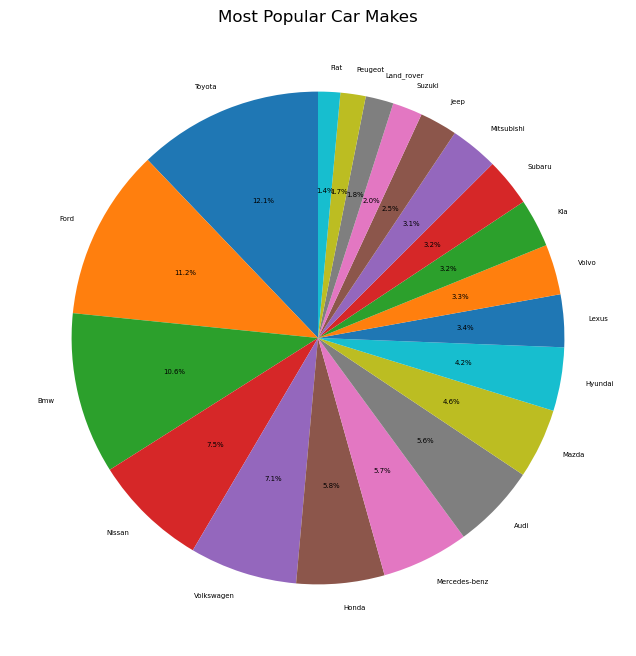

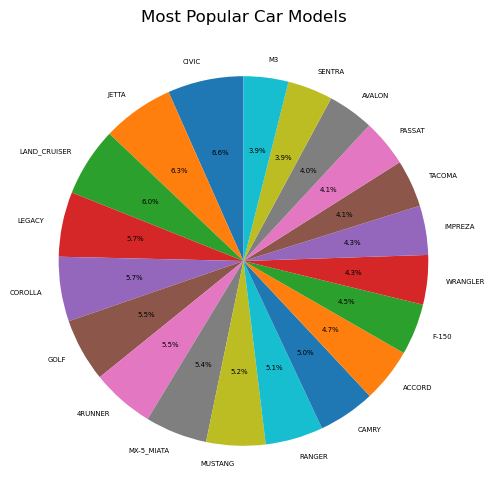

In [24]:
car_makes = df['car_make'].value_counts()
top_50_car_makes = car_makes.nlargest(20)

top_50_car_makes.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 8), textprops={'fontsize': 5})
plt.title('Most Popular Car Makes')
plt.ylabel('') 
plt.show()

car_models = df['car_model'].value_counts()
#print(car_models)
top_50_car_models = car_models.nlargest(20)

top_50_car_models.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(6, 6), textprops={'fontsize': 5})
plt.title('Most Popular Car Models')
plt.ylabel('') 
plt.show()



# Question 4

## 4.1 Outlier Removal

In [25]:
#find the number of transactions for each currency and then report the top 5
#ask chat to format it correctly
top_currencies = []
array = df['currency'].value_counts(dropna=True)
top_currencies.append(array[0:5])
print(f"The top 5 currencies, are from America, United Kingdom, Canada, Europe and South Afirca given by: {top_currencies} ")

The top 5 currencies, are from America, United Kingdom, Canada, Europe and South Afirca given by: [currency
$      183120
£       36613
CA$     17953
€       15126
R        9652
Name: count, dtype: int64] 


In [26]:
top_currencies = ["$", "£", "CA$", "€", "R"]

for curr in top_currencies:
    q = df[df['currency']==curr]['total_spent_float'].quantile([0.01, 0.99])
    print(f"{curr}: 1st percentile = {q[0.01]:.2f}, 99th percentile = {q[0.99]:.2f}")

thresholds = {
    '$': {'total_spent': (1, 1500), 'gallons': (1, 20), 'cost_per_gallon': (1, 10), 'mpg': (5, 60), 'miles': (1, 500)},
    '£': {'total_spent': (1, 120), 'gallons': (1, 15), 'cost_per_gallon': (1, 8), 'mpg': (5, 60), 'miles': (1, 500)},
    'CA$': {'total_spent': (1, 140), 'gallons': (1, 20), 'cost_per_gallon': (1, 10), 'mpg': (5, 60), 'miles': (1, 500)},
    '€': {'total_spent': (1, 140), 'gallons': (1, 18), 'cost_per_gallon': (1, 10), 'mpg': (5, 60), 'miles': (1, 500)},
    'R': {'total_spent': (1, 2100), 'gallons': (1, 40), 'cost_per_gallon': (0.5, 10), 'mpg': (5, 60), 'miles': (1, 1000)}
}


cleaned_dfs = {}
summary_stats = {}

for curr in top_currencies:
    subset = df[df['currency'] == curr].copy()
    
    t = thresholds[curr] 
    

    subset = subset[
        (subset['total_spent_float'].between(*t['total_spent'])) &
        (subset['gallons'].between(*t['gallons'])) &
        (subset['cost_per_gallon_float'].between(*t['cost_per_gallon'])) &
        (subset['mpg'].between(*t['mpg'])) &
        (subset['miles'].between(*t['miles']))
    ]
    
    cleaned_dfs[curr] = subset

    
    stats_before = df[df['currency']==curr][['total_spent_float', 'gallons', 'cost_per_gallon_float', 'mpg', 'miles']].describe()
    stats_after = subset[['total_spent_float', 'gallons', 'cost_per_gallon_float', 'mpg', 'miles']].describe()
    
    summary_stats[curr] = {'before': stats_before, 'after': stats_after}

cols = ['total_spent_float', 'gallons', 'cost_per_gallon_float', 'mpg', 'miles']

for curr in top_currencies:
    stats_before = df[df['currency']==curr][cols].agg(['count', 'mean', 'min', 'max'])
    stats_after = cleaned_dfs[curr][cols].agg(['count', 'mean', 'min', 'max'])
    
    print(f"\n=== {curr} ===")
    print("Before Cleaning:")
    print(stats_before.T)
    print("After Cleaning:")
    print(stats_after.T)



$: 1st percentile = 0.00, 99th percentile = 1499.99
£: 1st percentile = 0.00, 99th percentile = 117.24
CA$: 1st percentile = 0.00, 99th percentile = 139.73
€: 1st percentile = 0.00, 99th percentile = 137.28
R: 1st percentile = 0.00, 99th percentile = 2112.70

=== $ ===
Before Cleaning:
                          count        mean  min          max
total_spent_float      183120.0  317.670809  0.0  2000001.190
gallons                109766.0   13.392636  0.0    16378.667
cost_per_gallon_float  182042.0   31.023996  0.0   132489.412
mpg                    109765.0   23.689887  0.1      399.900
miles                  124328.0  256.356582  0.0    50356.800
After Cleaning:
                         count        mean    min    max
total_spent_float      92611.0   41.098509   2.36  190.0
gallons                92611.0   12.177959   1.00   20.0
cost_per_gallon_float  92611.0    3.399477   1.00   10.0
mpg                    92611.0   22.966981   5.00   60.0
miles                  92611.0  268.7042

In [27]:

top_currencies = ["$", "£", "CA$", "€", "R"]

for curr in top_currencies:
    original_count = len(df[df['currency'] == curr])
    cleaned_count = len(cleaned_dfs[curr])
    removed_count = original_count - cleaned_count
    print(f"{curr}: {removed_count} rows removed ({removed_count/original_count:.2%})")


$: 90509 rows removed (49.43%)
£: 27764 rows removed (75.83%)
CA$: 11680 rows removed (65.06%)
€: 9026 rows removed (59.67%)
R: 9624 rows removed (99.71%)


# 4.2 Fuel Efficiency

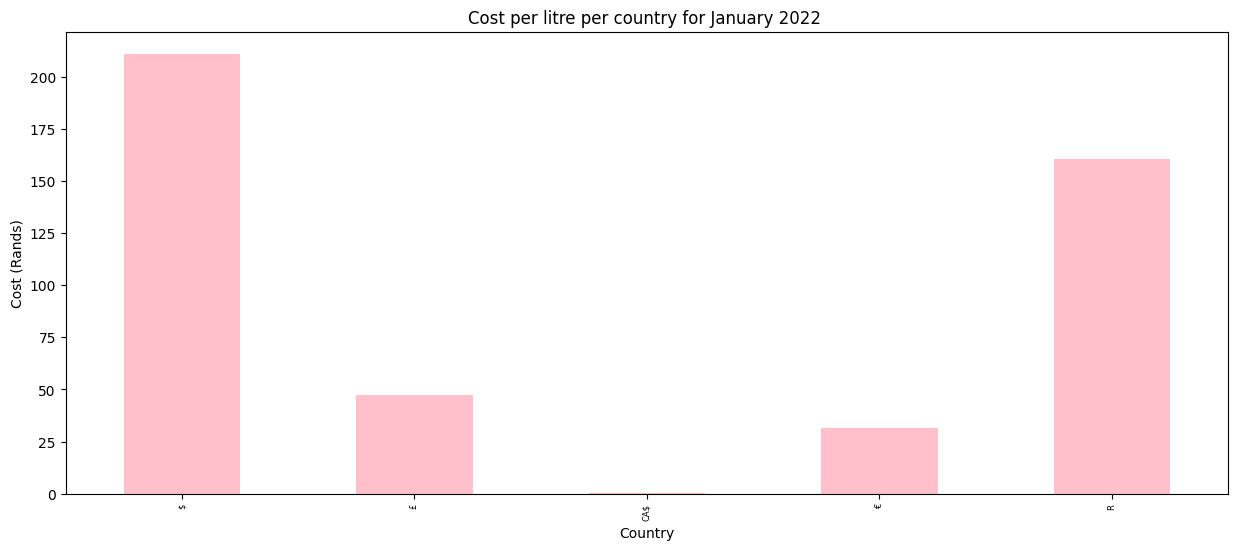

Discussion: Canadia is at 0, probably because no data exists for the canadian dollar in January 2022.
 It may be cheaper in euros and britain because of how much their respective currencies weigh. with america, im not sure tho


In [134]:
#4.2.1
#source for exchnage rates: https://personal.nedbank.co.za/bank/international-banking/forex-rates.html
top_currencies = ["$", "£", "CA$", "€", "R"]

exchange_rates= {
    '$': 17.27,   
    '£': 23.11,  
    'CA$': 0.08, 
    '€': 19.93,   
    'R': 1.0     
}

df['currency']= df['cost_per_gallon'].str.extract(r'([£$CA€R]+)')[0]
df['cost_per_gallon_rand']=df['cost_per_gallon_float']* df['currency'].map(exchange_rates)
df['cost_per_liter_rand']=df['cost_per_gallon_rand']/3.78541

jan_2022 = df[(df['date_fueled'].dt.year == 2022) & (df['date_fueled'].dt.month == 1)]

comp_fuel_prices = jan_2022.groupby('currency')['cost_per_liter_rand'].mean()
comp_fuel_prices = comp_fuel_prices.loc[top_currencies]

fig, ax = plt.subplots(figsize=(15,6))
comp_fuel_prices.plot(kind='bar', ax=ax, color='pink') 

ax.set_xlabel("Country")
ax.set_ylabel("Cost (Rands)")
ax.set_title("Cost per litre per country for January 2022 ")
ax.tick_params(axis='x', labelsize=6)

plt.show()

print("Discussion: Canadia is at 0, probably because no data exists for the canadian dollar in January 2022.\n It may be cheaper in euros and britain because of how much their respective currencies weigh. with america, im not sure tho")



In [135]:
#4.4.2

average_miles_per_tank = df['miles'].mean()
print(f"\n Average miles driven per tank: {average_miles_per_tank}")

user_counts = df['user_id'].value_counts()
repeated_users = user_counts[user_counts > 1].index
df_repeated = df[df['user_id'].isin(repeated_users)].copy()

df_repeated['odometer'] = pd.to_numeric(df_repeated['odometer'], errors='coerce')
df_repeated = df_repeated.dropna(subset=['odometer'])
df_repeated = df_repeated.sort_values(['user_id', 'date_fueled'])

df_repeated['prev_odometer'] = df_repeated.groupby('user_id')['odometer'].shift(1)
df_repeated['odometer_diff'] = df_repeated['odometer'] - df_repeated['prev_odometer']

#if difference in odometer reading is higher than average distance driven per tank, possibly missing log.
distance_threshold = 265
print(f"\nUsing distance threshold: {distance_threshold} miles")

df_repeated['missing_fillup'] = (
    (df_repeated['odometer_diff'] > distance_threshold) &
    (df_repeated['odometer_diff'] > 0) 
)

potential_missing_logs = df_repeated[df_repeated['missing_fillup']]

print(f"\nEstimated number of users that missed logging a fill-up: {potential_missing_logs.shape[0]}")



 Average miles driven per tank: 264.49880815997125

Using distance threshold: 265 miles

Estimated number of users that missed logging a fill-up: 59


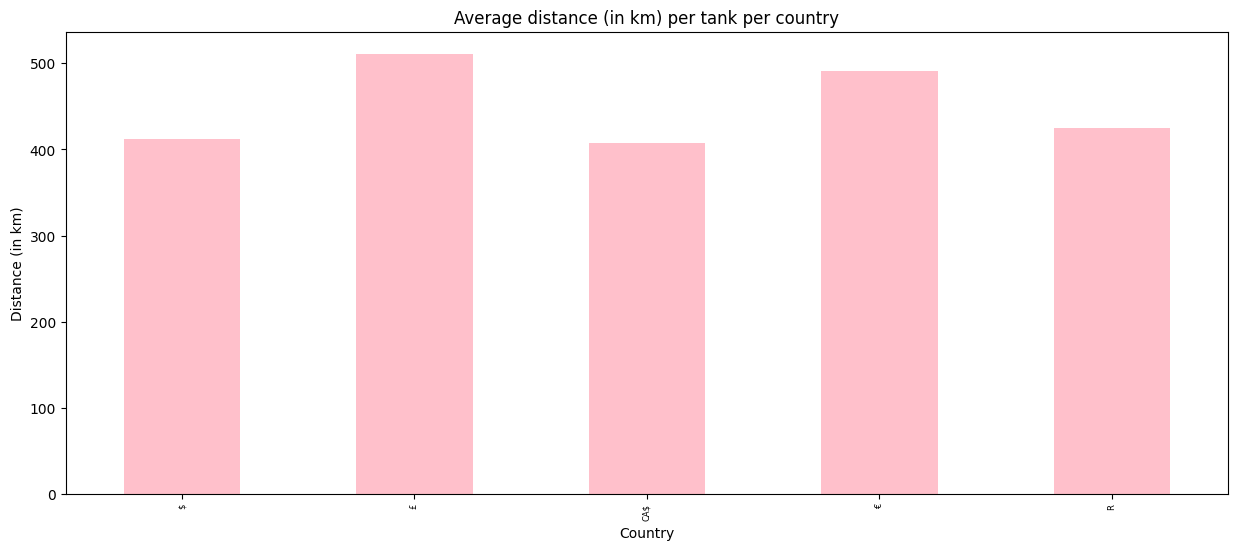

Britain has the largest average distance. 
 Why tho? Because it is cheaper? Because cars over there are more fuel efficient?


In [136]:
#4.2.3

distance_per_tank= df.groupby('currency')['km_driven'].mean()
distance_per_tank= distance_per_tank.loc[top_currencies]

fig, ax = plt.subplots(figsize=(15,6))
distance_per_tank.plot(kind='bar', ax=ax, color='pink') 

ax.set_xlabel("Country")
ax.set_ylabel("Distance (in km)")
ax.set_title("Average distance (in km) per tank per country")
ax.tick_params(axis='x', labelsize=6)

plt.show()

print("Britain has the largest average distance. \n Why tho? Because it is cheaper? Because cars over there are more fuel efficient?")

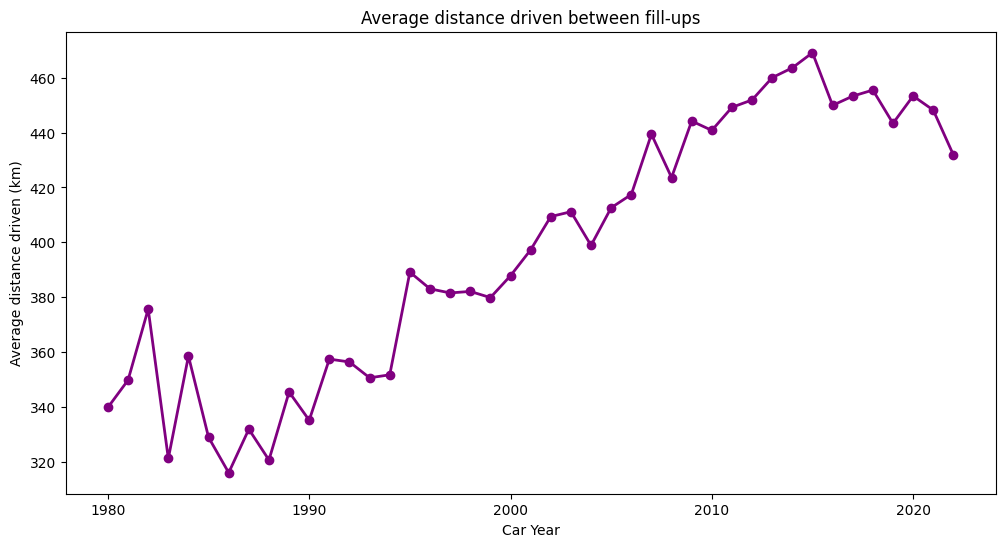

Discussion: yes in general, newer vehicles drive further distances between fillups


In [137]:
#4.2.4
df_clean = df.dropna(subset=['car_year', 'km_driven'])
df_clean = df_clean[(df_clean['car_year'] >= 1980) & (df_clean['car_year'] <= 2024)]
yearly_avg = df_clean.groupby('car_year')['km_driven'].mean().reset_index()


plt.figure(figsize=(12, 6))
plt.plot(yearly_avg['car_year'], yearly_avg['km_driven'], 
         marker='o', linewidth=2, markersize=6, color='purple')

plt.xlabel('Car Year')
plt.ylabel('Average distance driven (km)')
plt.title('Average distance driven between fill-ups')
plt.show()

print("Discussion: yes in general, newer vehicles drive further distances between fillups")

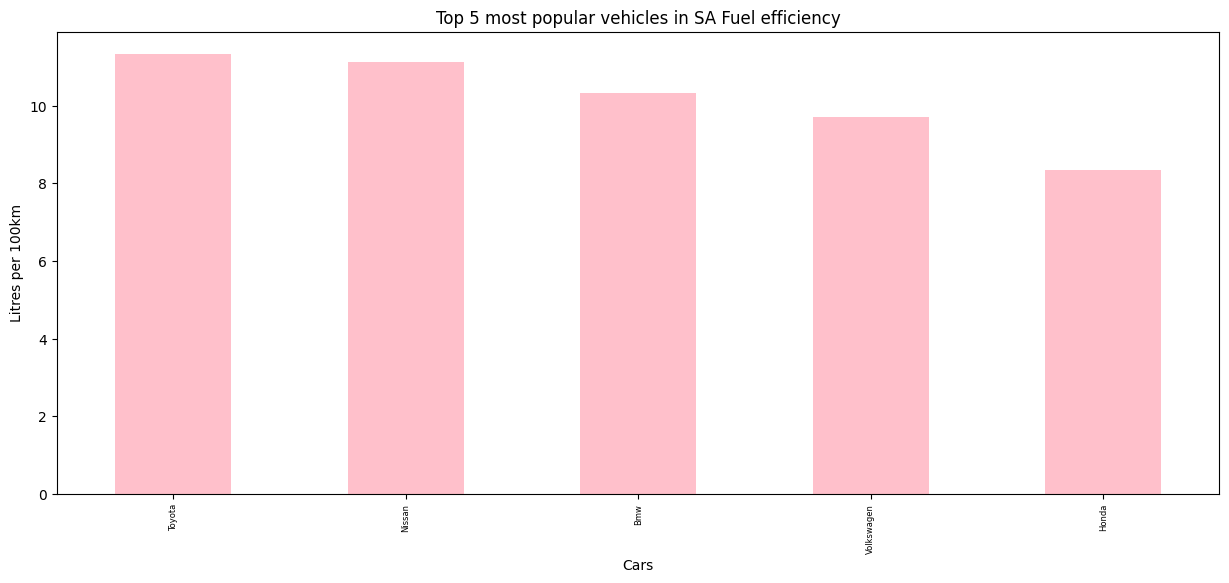

I think theyre realistic.


In [138]:
#4.2.5

SA_cars= df[df['currency'] == 'R']
counts=SA_cars.groupby('car_make').size()
top_5= counts.nlargest(5).index
fuel_efficiency= SA_cars.groupby('car_make')['litres_per_100km'].mean().loc[top_5]

fig, ax= plt.subplots(figsize=(15,6))
fuel_efficiency.plot(kind='bar', ax=ax, color='pink') 

ax.set_xlabel("Cars")
ax.set_ylabel("Litres per 100km")
ax.set_title("Top 5 most popular vehicles in SA Fuel efficiency")
ax.tick_params(axis='x', labelsize=6)

plt.show()

print("I think theyre realistic.")

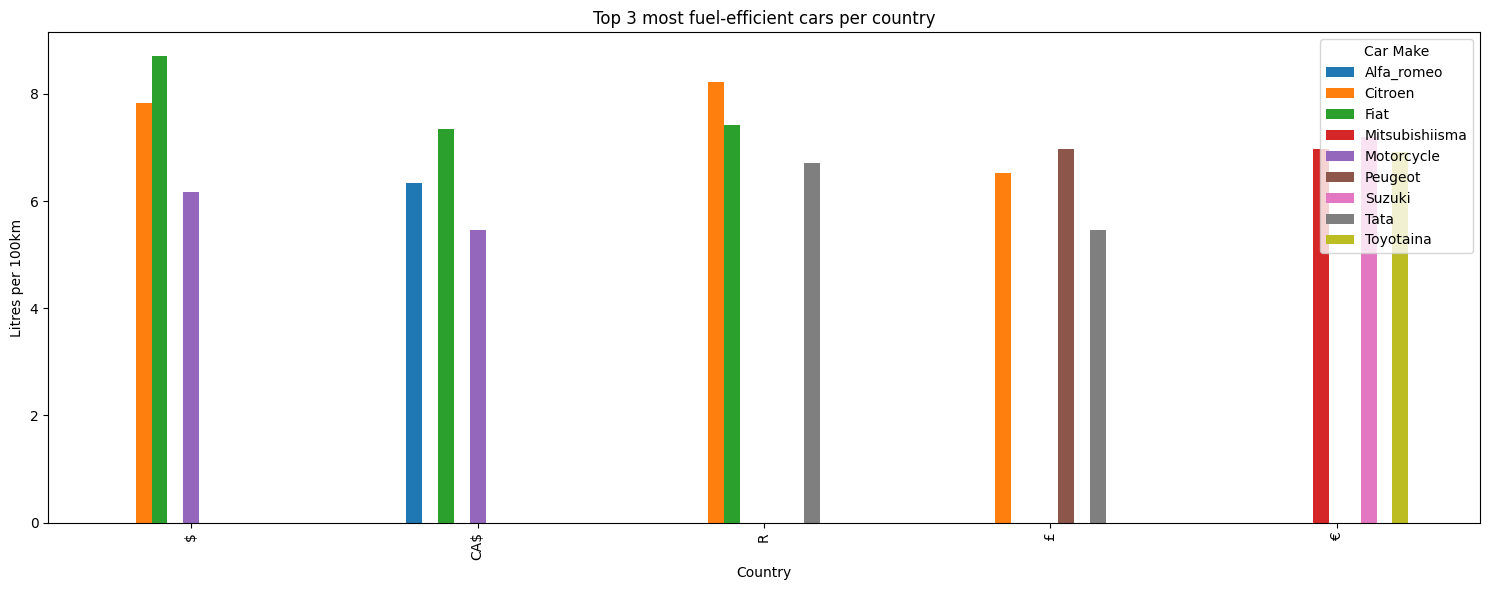

Discussion: 


In [139]:
#4.2.6

top_countries = df[df['currency'].isin(top_currencies)]
fuel_efficiency_avg = top_countries.groupby(['currency', 'car_make'])['litres_per_100km'].mean().reset_index()
sorted_fuel_efficiency = fuel_efficiency_avg.sort_values(['currency', 'litres_per_100km'], ascending=[True, True])
top_cars_per_country = sorted_fuel_efficiency.groupby('currency').head(3)

pivot = top_cars_per_country.pivot(index='currency', columns='car_make', values='litres_per_100km')
fig, ax = plt.subplots(figsize=(15,6))
pivot.plot(kind='bar', ax=ax, width=0.5)

# Labels and title
ax.set_xlabel("Country")
ax.set_ylabel("Litres per 100km")
ax.set_title("Top 3 most fuel-efficient cars per country")
ax.tick_params(axis='x', labelsize=10)
plt.legend(title='Car Make')
plt.tight_layout()
plt.show()

print("Discussion: ")

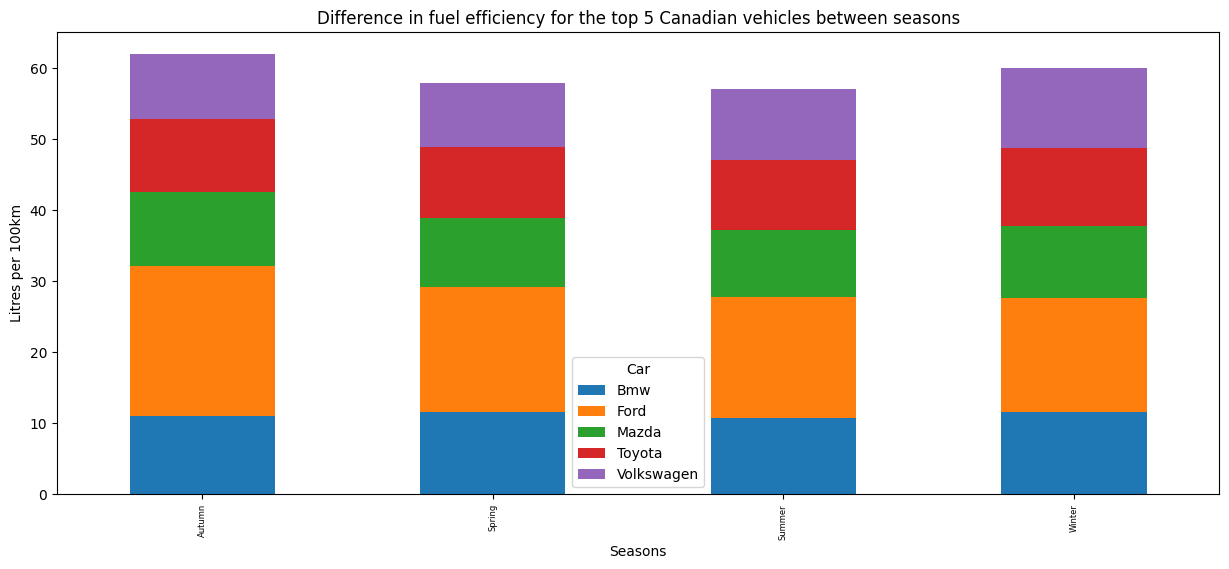

Winter and Autumn are evidently the least fuel efficient, because the car is colder? 


In [147]:
#4.2.7

def get_season(month):
    if month in [12, 1, 2]:
        return "Winter" 
    elif month in [3, 4, 5]:
        return "Spring" 
    elif month in [6, 7, 8]:
        return "Summer" 
    else:  
        return "Autumn" 

df["date_fueled_month"] = pd.to_datetime(df["date_fueled"])
df["season"] = df["date_fueled_month"].dt.month.map(get_season)

Can_cars= df[df['currency'] == 'CA$']
counts=Can_cars.groupby('car_make').size()
top_5= counts.nlargest(5).index

season_grouped = (Can_cars[Can_cars['car_make'].isin(top_5)].groupby(['season', 'car_make'])['litres_per_100km'].mean())

season_efficiency = season_grouped.unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(15,6))
season_efficiency.plot(kind='bar', stacked=True, ax=ax) 

ax.set_xlabel("Seasons")
ax.set_ylabel("Litres per 100km")
ax.set_title("Difference in fuel efficiency for the top 5 Canadian vehicles between seasons")
ax.tick_params(axis='x', labelsize=6)
ax.legend(title="Car")

plt.show()

print("Winter and Autumn are evidently the least fuel efficient, because the car is colder? ")

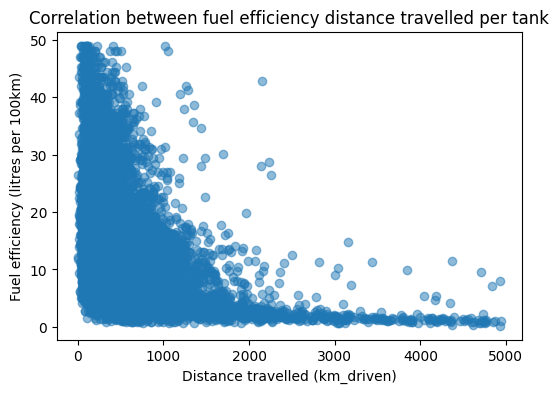

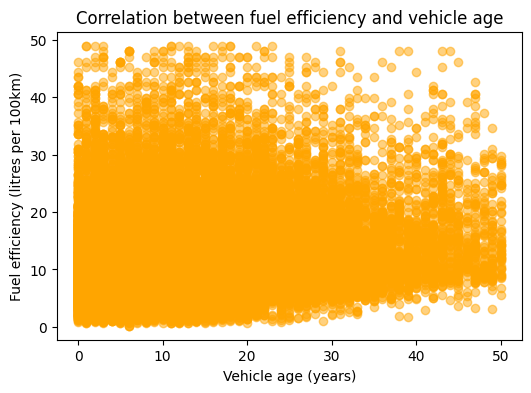

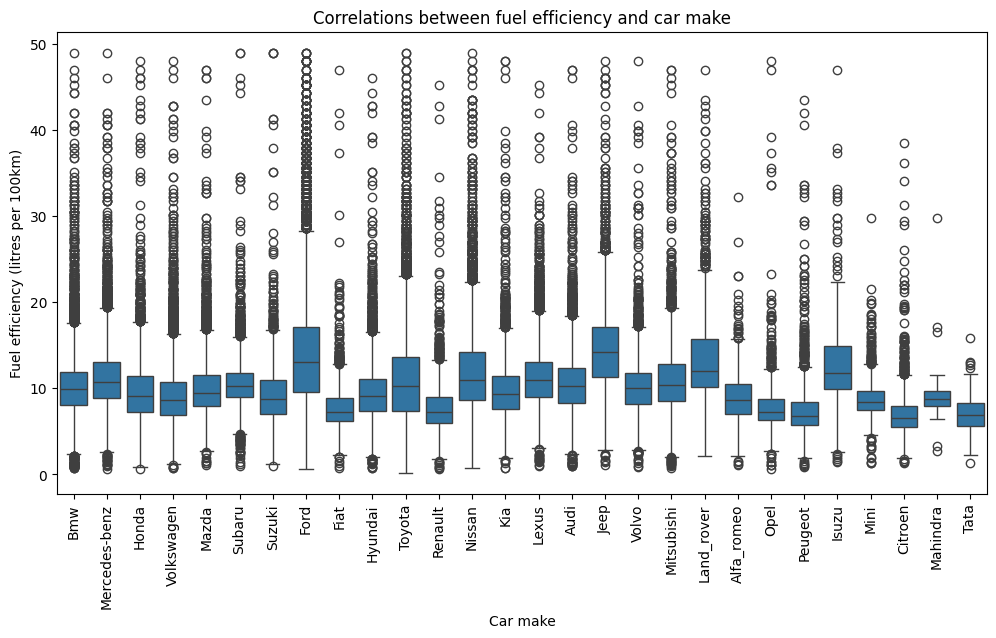

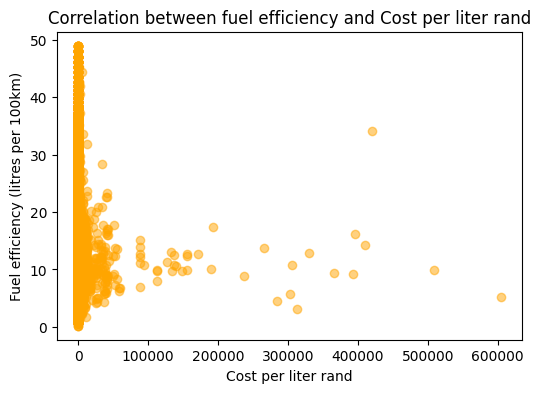

Findings: strong correlation between distance travelled per tank and fuel efficiency. 
 As cars get older, they do become less fuel efficient (the scatter starts at 0 but then increases along age). 
 With car makes, some cars such as Fiat have low medians and 1st quartile values, and not many outliers. This implis that Fiats are extremely fuel efficient, while the opposite can be said about Jeep.


In [157]:
#4.2.8


df_clean = df.dropna(subset=['age', 'km_driven', 'litres_per_100km', 'car_year'])
df_clean = df_clean[(df_clean['age'] >= 0) & (df_clean['age'] <= 50)]
df_clean = df_clean[(df_clean['km_driven'] >= 0) & (df_clean['km_driven'] <= 5000)]
df_clean = df_clean[(df_clean['litres_per_100km'] >= 0) & (df_clean['litres_per_100km'] <= 50)]


plt.figure(figsize=(6,4))
plt.scatter(df_clean['km_driven'], df_clean['litres_per_100km'], alpha=0.5)
plt.xlabel("Distance travelled (km_driven)")
plt.ylabel("Fuel efficiency (litres per 100km)")
plt.title("Correlation between fuel efficiency distance travelled per tank")
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(df_clean['age'], df_clean['litres_per_100km'], alpha=0.5, color="orange")
plt.xlabel("Vehicle age (years)")
plt.ylabel("Fuel efficiency (litres per 100km)")
plt.title("Correlation between fuel efficiency and vehicle age")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x="car_make", y="litres_per_100km", data=df_clean)
plt.xticks(rotation=90)
plt.xlabel("Car make")
plt.ylabel("Fuel efficiency (litres per 100km)")
plt.title("Correlations between fuel efficiency and car make")
plt.show()

#randomly did this one for fun
plt.figure(figsize=(6,4))
plt.scatter(df_clean['cost_per_liter_rand'], df_clean['litres_per_100km'], alpha=0.5, color="orange")
plt.xlabel("Cost per liter rand")
plt.ylabel("Fuel efficiency (litres per 100km)")
plt.title("Correlation between fuel efficiency and Cost per liter rand")
plt.show()

print("Findings: strong correlation between distance travelled per tank and fuel efficiency. \n As cars get older, they do become less fuel efficient (the scatter starts at 0 but then increases along age). \n With car makes, some cars such as Fiat have low medians and 1st quartile values, and not many outliers. This implis that Fiats are extremely fuel efficient, while the opposite can be said about Jeep.")


In [145]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import pandas as pd

data = df.copy()  # work on a copy

# Convert datetime columns to numeric features
datetime_cols = ['date_fueled', 'date_captured']  # add any datetime columns
for col in datetime_cols:
    if col in data.columns:
        data[col + '_year'] = data[col].dt.year
        data[col + '_month'] = data[col].dt.month
        data[col + '_day'] = data[col].dt.day
        data[col + '_weekday'] = data[col].dt.weekday
        data = data.drop(columns=[col])  # drop original datetime

# Now data has numeric features only, original df is unchanged


# Encode categorical columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    data[col] = LabelEncoder().fit_transform(data[col].astype(str))

# Features and target
target_col = 'litres_per_100km'
X = data.drop(columns=[target_col])
y = data[target_col]

# Fill missing values
X = X.fillna(0)
y = y.fillna(y.mean())

# Train Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X, y)

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)


mpg                      0.936906
gallons                  0.027219
litres_filled            0.022259
miles                    0.005053
km_driven                0.002506
date_captured_weekday    0.000918
user_url                 0.000653
user_id                  0.000552
car_make                 0.000520
cost_per_gallon          0.000362
cost_per_gallon_float    0.000311
season                   0.000289
date_fueled_day          0.000276
odometer                 0.000268
date_fueled_year         0.000224
total_spent_float        0.000179
total_spent              0.000176
car_model                0.000173
age                      0.000165
cost_per_liter_rand      0.000137
cost_per_gallon_rand     0.000137
car_year                 0.000125
date_fueled_month        0.000114
year_fueled              0.000112
date_fueled_weekday      0.000100
date_captured_day        0.000091
day                      0.000059
date_captured_year       0.000057
date_captured_month      0.000056
currency      

## 4.3 Fuel Usage in SA

In [41]:
# 4.3.1

sa_df = df[df["currency"] == "R"].copy()

print("Total SA records:", len(sa_df))
sa_df.head()

Total SA records: 9652


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,currency,...,car_make,car_model,car_year,user_id,litres_filled,km_driven,litres_per_100km,day,year_fueled,age
98,2022-04-05,2022-04-05,"78,429",NaN,R73.85,R780.40,NaN,0.0000,https://www.somewebsite.com/ford/transit_conne...,R,...,Ford,TRANSIT_CONNECT,2015.0,1103772,NaN,0.000000,NaN,2022-04-05,2022,7.0
100,2013-06-06,2013-06-08,NaN,17.937,R47.05,R843.99,23.3,417.9321,https://www.somewebsite.com/land_rover/discove...,R,...,Land_rover,DISCOVERY,1996.0,123580,67.898899,672.594846,10.095067,2013-06-08,2013,17.0
197,2019-01-23,2019-02-01,"169,070",NaN,R54.59,"R1,201.47",NaN,0.0000,https://www.somewebsite.com/nissan/patrol/1999...,R,...,Nissan,PATROL,1999.0,254197,NaN,0.000000,NaN,2019-02-01,2019,20.0
323,2018-08-12,2019-08-04,"41,111",6.763,R60.19,R407.04,40.7,275.2541,https://www.somewebsite.com/ford/ecosport/2013...,R,...,Ford,ECOSPORT,2013.0,942891,25.600728,442.977433,5.779240,2019-08-04,2018,5.0
334,2016-06-16,2016-06-16,"2,430",18.011,R48.45,R872.69,15.5,279.1705,https://www.somewebsite.com/land_rover/discove...,R,...,Land_rover,DISCOVERY,2016.0,426622,68.179020,449.280252,15.175165,2016-06-16,2016,0.0


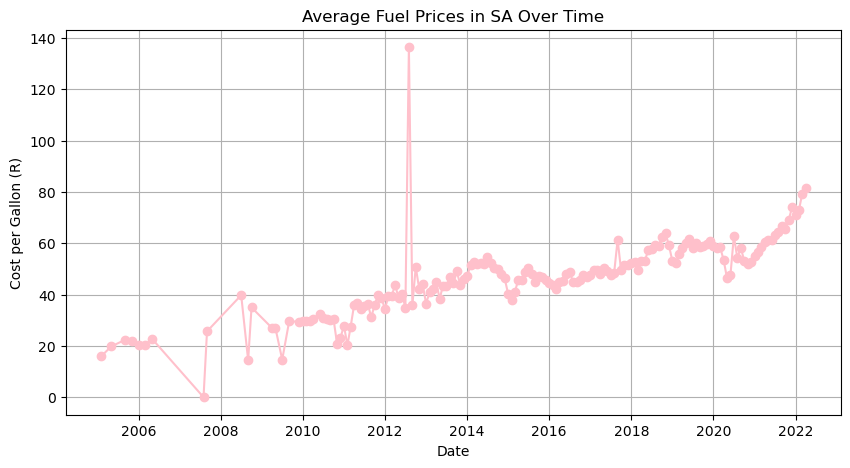

In [43]:
# 4.3.2

sa_df["cost_per_gallon"] = (
    sa_df["cost_per_gallon"]
    .astype(str)
    .str.replace("R", "", regex=False)  
    .str.replace(",", "", regex=False)  
)

sa_df["cost_per_gallon"] = pd.to_numeric(sa_df["cost_per_gallon"], errors="coerce")

price_time = (
    sa_df.groupby(sa_df["date_fueled"].dt.to_period("M"))["cost_per_gallon"]
    .mean()
    .reset_index()
)
price_time["date_fueled"] = price_time["date_fueled"].dt.to_timestamp()

plt.figure(figsize=(10,5))
plt.plot(price_time["date_fueled"], price_time["cost_per_gallon"], marker="o", color="pink")
plt.title("Average Fuel Prices in SA Over Time")
plt.xlabel("Date")
plt.ylabel("Cost per Gallon (R)")
plt.grid(True)
plt.show()

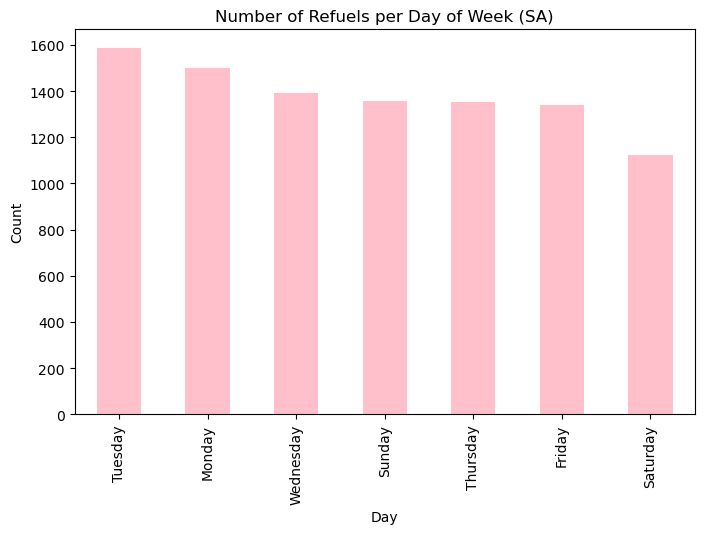

In [37]:
# 4.3.3

sa_df["day_of_week"] = sa_df["date_fueled"].dt.day_name()

tuesday_counts = sa_df["day_of_week"].value_counts()

plt.figure(figsize=(8,5))
tuesday_counts.plot(kind="bar", color="pink")
plt.title("Number of Refuels per Day of Week (SA)")
plt.ylabel("Count")
plt.xlabel("Day")
plt.show()

In [ ]:
# 4.3.4

sa_df["year"] = sa_df["date_fueled"].dt.year
sa_df["month"] = sa_df["date_fueled"].dt.month
sa_df["day"] = sa_df["date_fueled"].dt.day


first_days = sa_df.groupby(["year","month"])["date_fueled"].min().reset_index()


first_tue_wed = sa_df[
    (sa_df["day_of_week"].isin(["Tuesday","Wednesday"])) &
    (sa_df.groupby(["year","month"])["day"].transform("min") == sa_df["day"])
]

first_tue_wed.head()

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,currency,...,user_id,litres_filled,km_driven,litres_per_100km,day,year_fueled,age,day_of_week,year,month
871,2017-08-01,2017-08-01,"18,270",7.018,43.80,R307.36,18.3,128.4294,https://www.somewebsite.com/toyota/hilux/2012/...,R,...,141114,26.566007,206.686571,12.853282,1,2017,5.0,Tuesday,2017,8
2473,2016-06-01,2016-06-01,NaN,15.194,49.06,R745.40,22.7,344.9038,https://www.somewebsite.com/ford/kuga_mkii/201...,R,...,425106,57.515520,555.067481,10.361897,1,2016,1.0,Wednesday,2016,6
4142,2016-06-01,2016-06-01,"8,100",32.240,47.85,"R1,542.62",20.6,664.1440,https://www.somewebsite.com/toyota/land_cruise...,R,...,402016,122.041618,1068.833505,11.418207,1,2016,1.0,Wednesday,2016,6
7454,2020-12-01,2020-12-01,"45,891",9.410,55.23,R519.70,18.2,171.2620,https://www.somewebsite.com/suzuki/jimmy/2015/...,R,...,809937,35.620708,275.618787,12.923904,1,2020,5.0,Tuesday,2020,12
11047,2014-12-02,2014-12-02,"33,806",NaN,51.03,R547.67,NaN,0.0000,https://www.somewebsite.com/nissan/micra/2009/...,R,...,332925,NaN,0.000000,NaN,2,2014,5.0,Tuesday,2014,12


In [33]:
# 4.3.5

price_time["next_price"] = price_time["cost_per_gallon"].shift(-1)
price_time["price_change"] = price_time["next_price"] - price_time["cost_per_gallon"]


first_tue_wed = first_tue_wed.merge(price_time, on="date_fueled", how="left")


first_tue_wed["price_trend"] = first_tue_wed["price_change"].apply(
    lambda x: "Up" if x>0 else ("Down" if x<0 else "Same")
)

first_tue_wed[["date_fueled","day_of_week","price_trend"]].head()

,date_fueled,day_of_week,price_trend
0,2017-08-01,Tuesday,Up
1,2016-06-01,Wednesday,Up
2,2016-06-01,Wednesday,Up
3,2020-12-01,Tuesday,Up
4,2014-12-02,Tuesday,Same


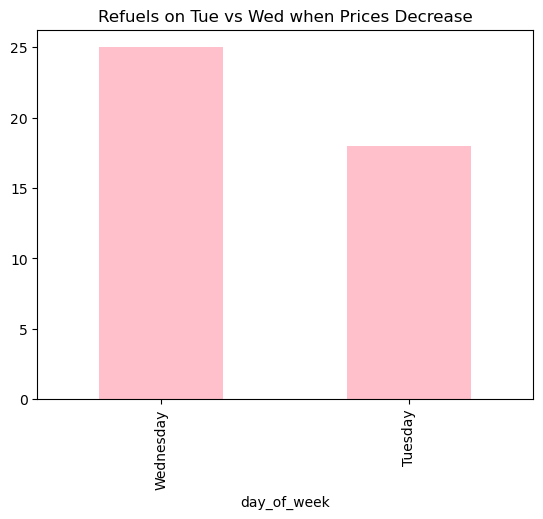

In [38]:
# 4.3.6

down_trend = first_tue_wed[first_tue_wed["price_trend"]=="Down"]

wed_vs_tue = down_trend["day_of_week"].value_counts()
wed_vs_tue.plot(kind="bar", title="Refuels on Tue vs Wed when Prices Decrease", color="pink")
plt.show()

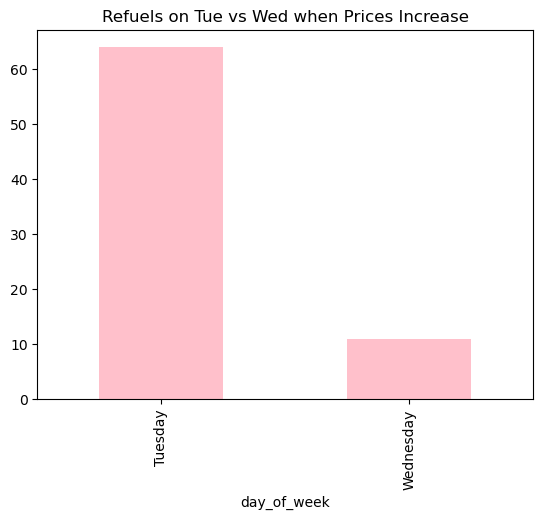

In [39]:
# 4.3.7

up_trend = first_tue_wed[first_tue_wed["price_trend"]=="Up"]

tue_vs_wed = up_trend["day_of_week"].value_counts()
tue_vs_wed.plot(kind="bar", title="Refuels on Tue vs Wed when Prices Increase",color="pink")
plt.show()